# Primera Entrega - Data Science I
Archivo: ProyectoDSParteI_Lobo.ipynb

#🧪 Abstract
Este análisis exploratorio examina los cambios en las estructuras productivas agrícolas y ganaderas a nivel global entre 1961 y 2023, utilizando datos de producción total, área cultivada y proporciones relativas por país. A partir de visualizaciones temporales, rankings dinámicos y clasificaciones por tendencias, se evaluó la evolución estructural de los sistemas productivos en función del tiempo y el contexto económico de cada país. Los resultados revelan patrones diferenciados entre países con economías más desarrolladas y aquellos en vías de desarrollo, evidenciando cómo la diversificación, la transición hacia cultivos de exportación o la consolidación de modelos agrícolas estables reflejan respuestas a políticas internas, demanda global y condiciones ambientales cambiantes.



##🧾 Introducción
El estudio de los sistemas agrícolas y ganaderos a nivel mundial es esencial para comprender las dinámicas de seguridad alimentaria, uso de recursos naturales y desarrollo económico. Gracias a la disponibilidad de datos históricos detallados, como los que proporciona FAOSTAT, es posible realizar análisis que vinculen la evolución de los cultivos y productos pecuarios con contextos geopolíticos, climáticos y económicos.

Este trabajo se basa en un extenso conjunto de datos longitudinales que incluye más de seis décadas de información anual sobre producción, rendimiento y superficie cosechada para cultivos específicos, desagregada por país. La base permite explorar no solo cómo se distribuyen los principales productos en diferentes regiones del mundo, sino también cómo ciertos países han modificado sus estrategias productivas a lo largo del tiempo, posiblemente en respuesta a cambios económicos, ambientales o de demanda global.

## 🔬 Hipótesis
"Los países con menor desarrollo económico tienden a mantener estructuras productivas agrícolas estables en el tiempo, mientras que los países con mayores ingresos muestran una mayor diversificación y cambio en sus principales cultivos, en respuesta a la demanda global y a políticas de valor agregado."

## 🎯 Objetivos del Análisis Exploratorio
Analizar tendencias temporales en la orientación productiva (agrícola vs. ganadera) de los países entre 1961 y 2023.

Comparar la evolución productiva entre países según su nivel de ingreso económico, utilizando clasificaciones del Banco Mundial.

Detectar transiciones estructurales en los sistemas de producción nacionales, como aumentos sostenidos en la proporción ganadera o cambios hacia modelos mixtos.

Visualizar rankings dinámicos y patrones de cambio (estable, creciente, decreciente) en la proporción de producción agrícola y ganadera para identificar trayectorias nacionales relevantes.

NOTA: Debido al tamaño del dataset, no pude agregarlo junto a la notebook en mi repositorio en GitHub.
El mismo puede descargarse de: https://www.kaggle.com/datasets/vijayveersingh/faostat-crops-and-livestock-data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = "/content/drive/MyDrive/1_Entrega_DS1/Production_Crops_Livestock_E_All_Data.xlsx"

In [ ]:
df = pd.read_excel(url)

Este dataset de FAOSTAT está en formato “ancho horizontal” (wide format), con columnas por año y sus flags asociados (F para tipo de flag y N para nota). Lo que necesitaba para mi análisis es:

- Convertirlo a formato largo con columnas: Area, Item, Element, Year, Value

- Filtrar solo las columnas de valor (Y1961, Y1962, … Y2023)

- Unificar elementos con unidades en columnas

- Clasificar países de acuerdo a sus perfiles agrícolas/ganaderos


In [ ]:
# Por este motivo, primero filtro solo las columnas necesarias (para quedarme con columnas de valores numéricos)
value_cols = [col for col in df.columns if col.startswith('Y') and not col.endswith(('F', 'N'))]

# Uso melt para convertir a formato largo
df_long = df.melt(
    id_vars=['Area', 'Item', 'Element',	'Unit'],
    value_vars=value_cols,
    var_name='Year',
    value_name='Value'
)
# Paso 3: eliminar la letra 'Y' y convertir a entero
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)


In [ ]:
df_long

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,"Almonds, in shell",Area harvested,ha,1961,0.00
1,Afghanistan,"Almonds, in shell",Yield,kg/ha,1961,NaN
2,Afghanistan,"Almonds, in shell",Production,t,1961,0.00
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,1961,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,kg/ha,1961,NaN
...,...,...,...,...,...,...
5021788,Net Food Importing Developing Countries,"Treenuts, Total",Yield,kg/ha,2023,682.70
5021789,Net Food Importing Developing Countries,"Treenuts, Total",Production,t,2023,2812938.79
5021790,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,ha,2023,7795058.00
5021791,Net Food Importing Developing Countries,Vegetables Primary,Yield,kg/ha,2023,12396.10


In [ ]:
# Creo una nueva columna combinada para Element y Unit:
df_long['Element_Unit'] = df_long['Element'].str.strip() + ' (' + df_long['Unit'].str.strip() + ')'

# Ahora pivoteo usando esa nueva columna como "columns"
df_wide = df_long.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element_Unit',
    values='Value'
).reset_index()

# Elimino el nombre residual del índice de columnas (por estética)
df_wide.columns.name = None


In [ ]:
df_wide

,Area,Item,Year,Area harvested (ha),Laying (1000 An),Milk Animals (An),Producing Animals/Slaughtered (1000 An),Producing Animals/Slaughtered (An),Production (1000 No),Production (t),Stocks (1000 An),Stocks (An),Stocks (No),Yield (100 g/An),Yield (100 mg/An),Yield (No/An),Yield (kg/ha),Yield/Carcass Weight (0.1 g/An),Yield/Carcass Weight (100 g/An)
0,Afghanistan,"Almonds, in shell",1961,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"Almonds, in shell",1962,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,"Almonds, in shell",1963,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,"Almonds, in shell",1964,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,"Almonds, in shell",1965,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734096,Zimbabwe,Wine,2009,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734097,Zimbabwe,Wine,2010,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734098,Zimbabwe,Wine,2011,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734099,Zimbabwe,Wine,2012,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora, teniendo el dataframe en el formato ideal para iniciar el análisis, comienzo por analizar cuántos datos útiles tengo por columna:

In [ ]:
df_wide.count().sort_values(ascending=False)

,0
Area,1734101
Item,1734101
Year,1734101
Production (t),1554707
Area harvested (ha),832999
Yield (kg/ha),808847
Producing Animals/Slaughtered (An),256644
Stocks (An),114743
Yield/Carcass Weight (100 g/An),93062
Yield (100 g/An),85309


In [ ]:
items_unicos = sorted(df_wide['Item'].dropna().unique())
print(items_unicos)

['Abaca, manila hemp, raw', 'Agave fibres, raw, n.e.c.', 'Almonds, in shell', 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus', 'Asses', 'Avocados', 'Balata, gutta-percha, guayule, chicle and similar natural gums in primary forms or in plates, sheets or strip', 'Bambara beans, dry', 'Bananas', 'Barley', 'Beans, dry', 'Beef and Buffalo Meat, primary', 'Beer of barley, malted', 'Bees', 'Beeswax', 'Blueberries', 'Brazil nuts, in shell', 'Broad beans and horse beans, dry', 'Broad beans and horse beans, green', 'Buckwheat', 'Buffalo', 'Buffalo fat, unrendered', 'Butter and Ghee', 'Butter and ghee of sheep milk', 'Butter of buffalo milk', 'Butter of cow milk', 'Buttermilk, dry', 'Cabbages', 'Camels', 'Canary seed', 'Cantaloupes and other melons', 'Carrots and turnips', 'Cashew nuts, in shell', 'Cashewapple', 'Cassava leaves', 'Cassava, fresh', 'Castor oil seeds', 'Cattle', 'Cattle and Buffaloes', 'Cattl

In [ ]:
clasificacion_dict = {
    'Abaca, manila hemp, raw': 'Agrícola',
    'Agave fibres, raw, n.e.c.': 'Agrícola',
    'Almonds, in shell': 'Agrícola',
    'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw': 'Agrícola',
    'Apples': 'Agrícola',
    'Apricots': 'Agrícola',
    'Areca nuts': 'Agrícola',
    'Artichokes': 'Agrícola',
    'Asparagus': 'Agrícola',
    'Asses': 'Ganadera',
    'Avocados': 'Agrícola',
    'Bananas': 'Agrícola',
    'Barley': 'Agrícola',
    'Beans, dry': 'Agrícola',
    'Beef and Buffalo Meat, primary': 'Ganadera',
    'Beer of barley, malted': 'Agrícola',
    'Bees': 'Otro',
    'Beeswax': 'Otro',
    'Blueberries': 'Agrícola',
    'Brazil nuts, in shell': 'Agrícola',
    'Cabbages': 'Agrícola',
    'Camels': 'Ganadera',
    'Carrots and turnips': 'Agrícola',
    'Cassava, fresh': 'Agrícola',
    'Cattle': 'Ganadera',
    'Cheese (All Kinds)': 'Ganadera',
    'Cherries': 'Agrícola',
    'Chick peas, dry': 'Ganadera',
    'Chickens': 'Ganadera',
    'Citrus Fruit, Total': 'Agrícola',
    'Cocoa beans': 'Agrícola',
    'Coconuts, in shell': 'Agrícola',
    'Coffee, green': 'Agrícola',
    'Cotton lint, ginned': 'Agrícola',
    'Dates': 'Agrícola',
    'Ducks': 'Ganadera',
    'Eggs Primary': 'Ganadera',
    'Figs': 'Agrícola',
    'Grapes': 'Agrícola',
    'Green corn (maize)': 'Agrícola',
    'Honey': 'Ganadera',
    'Horses': 'Ganadera',
    'Maize (corn)': 'Agrícola',
    'Meat of pigs, fresh or chilled': 'Ganadera',
    'Milk, Total': 'Ganadera',
    'Molasses': 'Ganadera',
    'Natural honey': 'Ganadera',
    'Olive oil': 'Agrícola',
    'Olives': 'Agrícola',
    'Oranges': 'Agrícola',
    'Peaches and nectarines': 'Agrícola',
    'Pears': 'Agrícola',
    'Pigs': 'Ganadera',
    'Pineapples': 'Agrícola',
    'Potatoes': 'Agrícola',
    'Poultry Birds': 'Ganadera',
    'Pumpkins, squash and gourds': 'Agrícola',
    'Rabbits and hares': 'Ganadera',
    'Rape or colza seed': 'Agrícola',
    'Rice': 'Agrícola',
    'Sheep': 'Ganadera',
    'Soybeans': 'Agrícola',
    'Strawberries': 'Agrícola',
    'Sugar cane': 'Agrícola',
    'Sunflower seed': 'Agrícola',
    'Tea leaves': 'Agrícola',
    'Tomatoes': 'Agrícola',
    'Turkeys': 'Ganadera',
    'Vegetables Primary': 'Agrícola',
    'Wheat': 'Agrícola',
    'Wine': 'Otro',
    'Yams': 'Agrícola',
    'Yoghurt': 'Ganadera'
}


In [ ]:
df_wide['Tipo'] = df_wide['Item'].map(clasificacion_dict).fillna('Desconocida')
df_wide.head()

,Area,Item,Year,Area harvested (ha),Laying (1000 An),Milk Animals (An),Producing Animals/Slaughtered (1000 An),Producing Animals/Slaughtered (An),Production (1000 No),Production (t),Stocks (1000 An),Stocks (An),Stocks (No),Yield (100 g/An),Yield (100 mg/An),Yield (No/An),Yield (kg/ha),Yield/Carcass Weight (0.1 g/An),Yield/Carcass Weight (100 g/An),Tipo
0,Afghanistan,"Almonds, in shell",1961,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agrícola
1,Afghanistan,"Almonds, in shell",1962,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agrícola
2,Afghanistan,"Almonds, in shell",1963,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agrícola
3,Afghanistan,"Almonds, in shell",1964,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agrícola
4,Afghanistan,"Almonds, in shell",1965,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agrícola


In [ ]:
df_prod_tipo = df_wide[df_wide['Production (t)'].notna()]
df_grouped = df_prod_tipo.groupby(['Area', 'Year', 'Tipo'])['Production (t)'].sum().reset_index()

# Pivot para tener columnas 'Agrícola' y 'Ganadera'
df_pivot = df_grouped.pivot(index=['Area', 'Year'], columns='Tipo', values='Production (t)').fillna(0).reset_index()
df_pivot['Proporcion_Ganadera'] = df_pivot['Ganadera'] / (df_pivot['Ganadera'] + df_pivot['Agrícola'])
df_pivot['Proporcion_Agricola'] = df_pivot['Agrícola'] / (df_pivot['Ganadera'] + df_pivot['Agrícola'])


In [ ]:
df_grouped

,Area,Year,Tipo,Production (t)
0,Afghanistan,1961,Agrícola,4491581.60
1,Afghanistan,1961,Desconocida,6540069.76
2,Afghanistan,1961,Ganadera,646114.00
3,Afghanistan,1962,Agrícola,4501489.76
4,Afghanistan,1962,Desconocida,6665087.16
...,...,...,...,...
49506,Zimbabwe,2022,Desconocida,14534192.55
49507,Zimbabwe,2022,Ganadera,1308892.64
49508,Zimbabwe,2023,Agrícola,12111185.23
49509,Zimbabwe,2023,Desconocida,14620558.30


In [ ]:
df_pivot

Tipo,Area,Year,Agrícola,Desconocida,Ganadera,Otro,Proporcion_Ganadera,Proporcion_Agricola
0,Afghanistan,1961,4491581.60,6540069.76,646114.00,0.0,0.125759,0.874241
1,Afghanistan,1962,4501489.76,6665087.16,652670.80,0.0,0.126630,0.873370
2,Afghanistan,1963,4218381.60,6570870.33,725633.25,0.0,0.146770,0.853230
3,Afghanistan,1964,4647089.76,6976211.98,739650.00,0.0,0.137309,0.862691
4,Afghanistan,1965,4756481.60,7283665.45,806264.00,0.0,0.144940,0.855060
...,...,...,...,...,...,...,...,...
14073,Zimbabwe,2019,11079316.97,13092436.74,1183066.97,0.0,0.096479,0.903521
14074,Zimbabwe,2020,14026617.25,14862587.24,1204225.20,0.0,0.079065,0.920935
14075,Zimbabwe,2021,13088830.14,16012722.77,1286383.76,0.0,0.089486,0.910514
14076,Zimbabwe,2022,11651704.18,14534192.55,1308892.64,0.0,0.100990,0.899010


In [ ]:
# Algunas áreas están en otro formato que no es el latino, por eso:
df_pivot['Area'] = df_pivot['Area'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# Obtener valores únicos
areas_unicas = sorted(df_pivot['Area'].unique())
areas_unicas

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Americas',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Asia',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belgium-Luxembourg',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'China, mainland',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'D

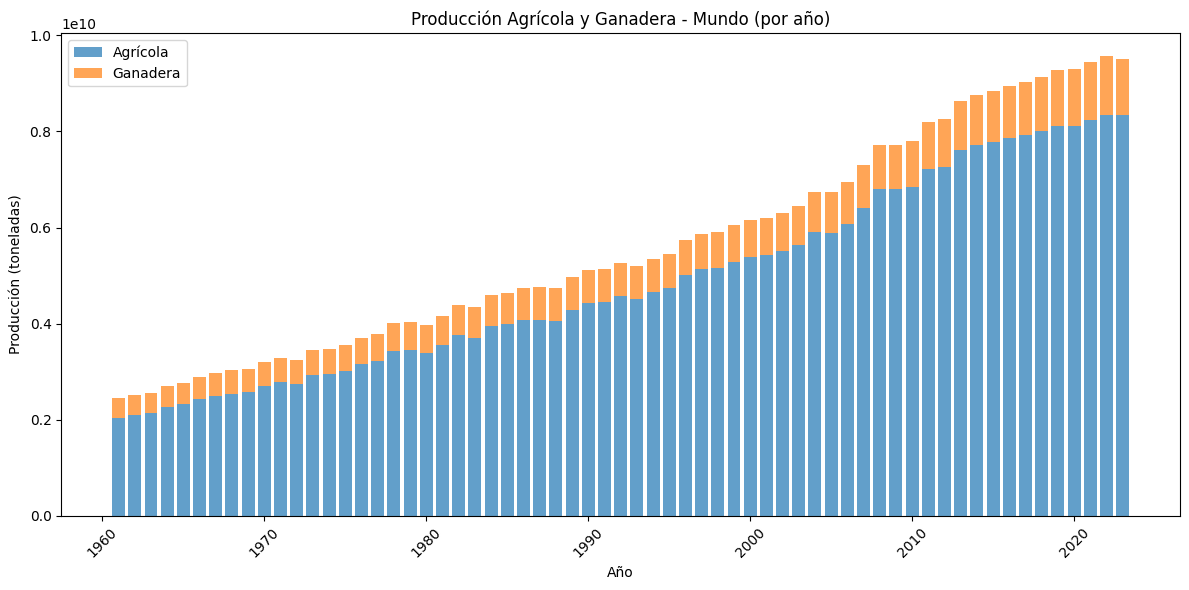

In [ ]:
# Para comenzar con una gráfica sencilla, filtro los datos del área 'World' para ver la producción agrícola y ganadera a nivel mundial:
df_world = df_pivot[df_pivot['Area'] == 'World']

# Agrupo por año y sumo las producciones agrícola y ganadera
df_grouped = df_world.groupby('Year')[['Agrícola', 'Ganadera']].sum().reset_index()

# Creo gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['Year'], df_grouped['Agrícola'], label='Agrícola', alpha=0.7)
plt.bar(df_grouped['Year'], df_grouped['Ganadera'], bottom=df_grouped['Agrícola'], label='Ganadera', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Producción (toneladas)')
plt.title('Producción Agrícola y Ganadera - Mundo (por año)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico de barras apiladas muestra claramente la evolución de la producción agrícola y ganadera global desde 1961 hasta 2023.

## 🔍 Observaciones principales:
- Crecimiento constante:

La producción agrícola (en azul) muestra un crecimiento sostenido y dominante a lo largo de todo el período.

La producción ganadera (en naranja) también crece, pero de forma más moderada.

- Relación entre sectores:

Se mantiene aproximadamente una proporción de 1:6 a 1:10 entre ganadería y agricultura, lo que confirma lo observado en el análisis estadístico: el sector agrícola representa la gran mayoría del volumen en toneladas.

- Etapas clave de aceleración:

Se nota un salto importante en la pendiente del crecimiento agrícola a partir de los años 2000, posiblemente asociado a políticas de intensificación, expansión de superficie cultivada, o mejoras tecnológicas globales.

In [ ]:
# Para analizar por países, quiero eliminar zonas que pueden interrumpir el análisis. Estas zonas corresponden a nombres de continentes, nombres repetidos e incluso los datos de "World" que engloban las métricas de todos los países:
agregados=['Africa','Americas', 'Asia', 'Australia and New Zealand', 'Central America', 'Central Asia','China, mainland', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Europe', 'European Union (27)', 'Land Locked Developing Countries', 'Least Developed Countries', 'Low Income Food Deficit Countries', 'Middle Africa', 'Net Food Importing Developing Countries', 'Northern Africa', 'Northern America', 'Northern Europe', 'Oceania', 'Small Island Developing States', 'South Africa', 'South America', 'South-eastern Asia',
 'Southern Africa', 'Southern Asia', 'Southern Europe', 'United Kingdom of Great Britain and Northern Ireland', 'Western Africa', 'Western Asia', 'Western Europe', 'World']
df_pivot = df_pivot[~df_pivot['Area'].isin(agregados)]

# Chequeo que se haya producido correctamente la supresión:
sorted(df_pivot['Area'].unique())


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belgium-Luxembourg',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'E

In [ ]:
# Filtro columnas relevantes para un análisis estadístico
relevant_cols = ['Area', 'Year', 'Agrícola', 'Ganadera']
df_statistics = df_pivot[relevant_cols]

# Calculo medidas de tendencia central y dispersión
summary_stats = df_statistics[['Agrícola', 'Ganadera']].describe().T

# Renombro columnas para claridad
Medidas = summary_stats.rename(columns={
    'mean': 'Media',
    '50%': 'Mediana',
    'std': 'Desvío estándar',
    'min': 'Mínimo',
    'max': 'Máximo'
})

Medidas

,count,Media,Desvío estándar,Mínimo,25%,Mediana,75%,Máximo
Tipo,,,,,,,,
Agrícola,12030.0,2.559066e+07,1.035435e+08,0.0,304501.9225,3380779.55,1.229865e+07,1.830314e+09
Ganadera,12030.0,3.790992e+06,1.359820e+07,0.0,27280.3500,311463.61,2.079749e+06,2.705250e+08


📊 Estas medidas de tendencia central implican que:

- En promedio, los países tienen alrededor de 6.7 veces más producción agrícola que ganadera (25.6M / 3.79M ≈ 6.7). No es exactamente 10 veces, pero sí una diferencia considerable.

- El rango de valores (mínimo a máximo) muestra que algunos países pueden tener producciones agrícolas extremadamente altas (como China, EE.UU., India), lo que eleva el promedio y el desvío estándar.

Para hacer más sencillo el inicio del análisis, debido al tamaño del dataset, agruparé los 10 países con mayor producción de los últimos 5 años:

In [ ]:
# Filtro los últimos 5 años del dataset
ultimos_5_anios = df_pivot[df_pivot['Year'] >= df_pivot['Year'].max() - 4]

# Agrupo por país y sumamos la producción total (Agrícola + Ganadera)
ultimos_5_anios['Total_produccion'] = ultimos_5_anios['Agrícola'] + ultimos_5_anios['Ganadera']
produccion_total_por_pais = ultimos_5_anios.groupby('Area')['Total_produccion'].sum().reset_index()

# Selecciono los 10 países con mayor producción
top10_paises = produccion_total_por_pais.sort_values(by='Total_produccion', ascending=False).head(10)

top10_paises_list = top10_paises['Area'].tolist()
top10_paises_list

<ipython-input-59-1465902128>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimos_5_anios['Total_produccion'] = ultimos_5_anios['Agrícola'] + ultimos_5_anios['Ganadera']


['China',
 'India',
 'Brazil',
 'United States of America',
 'Russian Federation',
 'Pakistan',
 'Indonesia',
 'Thailand',
 'Nigeria',
 'Mexico']

Según el análisis, los países con mayor producción total (Agrícola + Ganadera) son:
- China
- India
- Brasil
- Estados Unidos de América
- Federación Rusa
- Pakistan
- Indonesia
- Tailandia
- Nigeria
- México

Quiero observar cómo fue la evolución de la producción de esos diez países en el tiempo. Por este motivo, haré un heatmap para observar producción año a año de los países seleccionados:

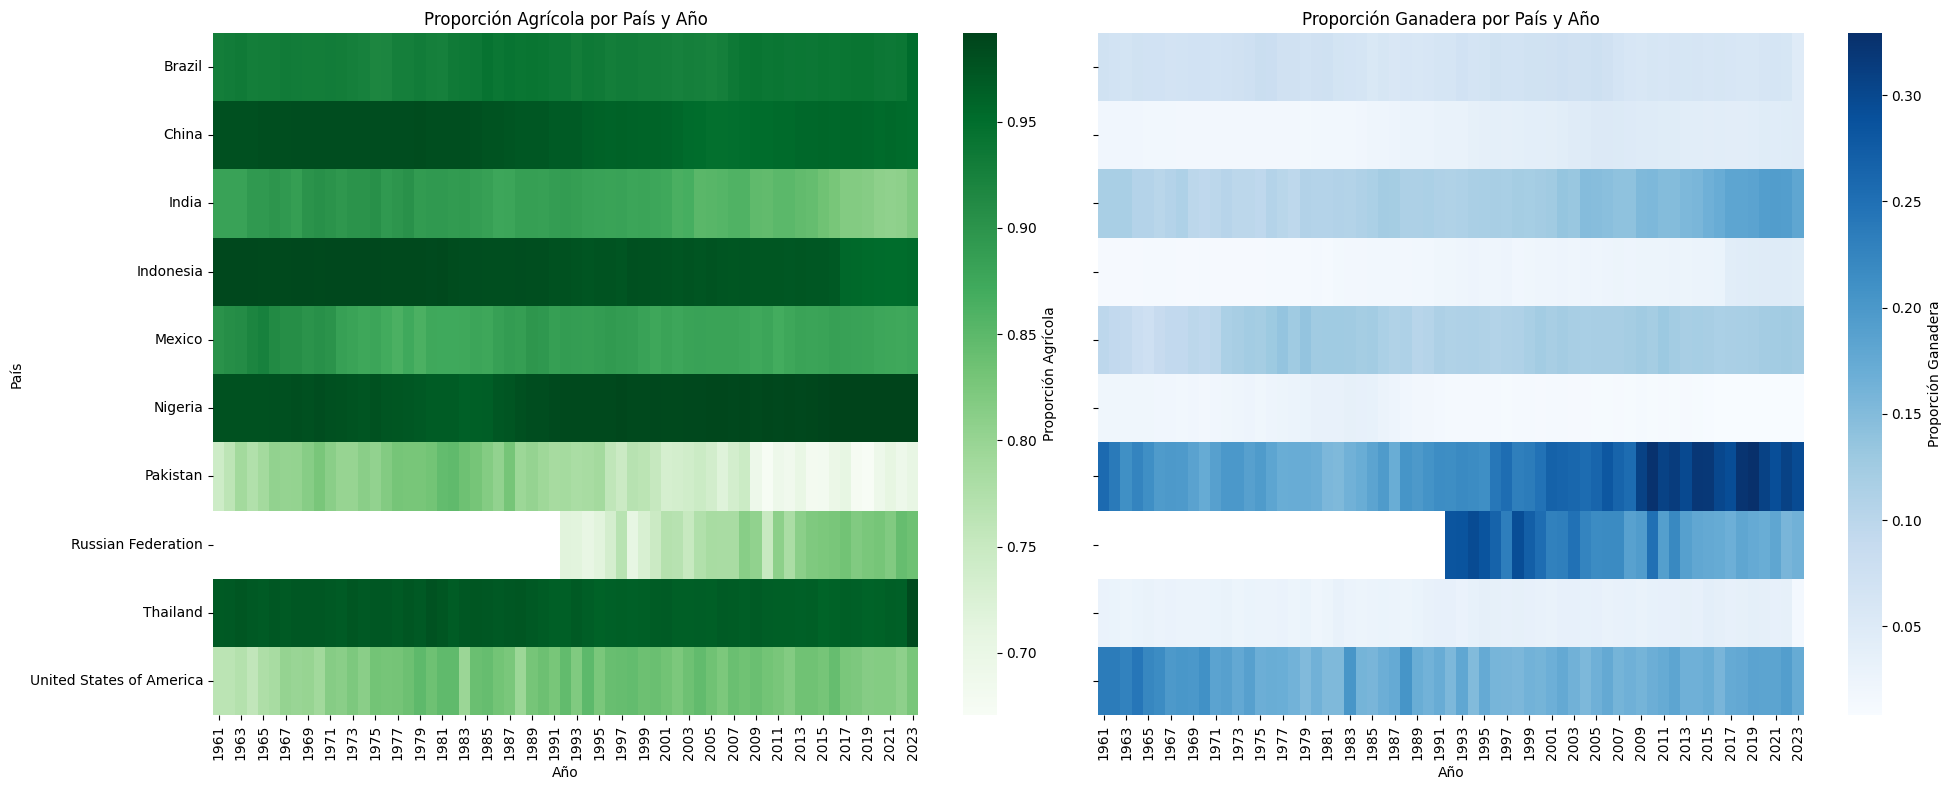

In [ ]:
# Filtro los 10 países seleccionados
paises_top10 = [
    'China', 'India', 'Brazil', 'United States of America',
    'Russian Federation', 'Pakistan', 'Indonesia', 'Thailand', 'Nigeria','Mexico'
]

df_top10 = df_pivot[df_pivot['Area'].isin(paises_top10)]

# Creo tablas tipo matriz para los heatmaps
heatmap_agricola = df_top10.pivot(index='Area', columns='Year', values='Proporcion_Agricola')
heatmap_ganadera = df_top10.pivot(index='Area', columns='Year', values='Proporcion_Ganadera')

# Grafico ambos heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.heatmap(heatmap_agricola, ax=axes[0], cmap='Greens', cbar_kws={'label': 'Proporción Agrícola'})
axes[0].set_title('Proporción Agrícola por País y Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('País')

sns.heatmap(heatmap_ganadera, ax=axes[1], cmap='Blues', cbar_kws={'label': 'Proporción Ganadera'})
axes[1].set_title('Proporción Ganadera por País y Año')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


## 🧩 Análisis del Gráfico de Proporción Agrícola y Ganadera por País y Año
El gráfico representa la evolución temporal de la proporción de producción agrícola y ganadera entre 1961 y 2023 en una selección de países con altos volúmenes de producción.

Se destacan las siguientes observaciones:

- Estabilidad agrícola sostenida: Países como Brasil, China, Indonesia, Nigeria y Tailandia presentan perfiles predominantemente agrícolas, con proporciones superiores al 90 % a lo largo de todo el período. Esta estabilidad sugiere una fuerte orientación estructural hacia cultivos, posiblemente vinculada a condiciones agroclimáticas favorables, disponibilidad de tierra cultivable y patrones culturales o alimentarios.

- Producción ganadera marginal o nula: En China, Indonesia y Nigeria, la proporción ganadera es prácticamente nula. Esto podría estar asociado a factores culturales, restricciones religiosas, hábitos alimentarios tradicionales o limitaciones territoriales para ganadería extensiva.

- Transición estructural en Pakistán: El caso de Pakistán es particularmente llamativo. A lo largo del tiempo, se observa una reducción sostenida de la proporción agrícola con un aumento correlativo de la ganadera. Este viraje podría interpretarse como resultado de presiones climáticas (desertificación, escasez hídrica), transformaciones económicas, incentivos a cadenas cárnicas o lácteas, o cambios en el consumo doméstico.

- Federación Rusa: No se registran datos antes de la década de 1990, probablemente debido a cambios geopolíticos y de disponibilidad estadística luego de la disolución de la URSS. A partir de entonces, se observa un perfil mixto, con leve predominancia agrícola.

- Estados Unidos: Exhibe un perfil balanceado y sostenido entre producción agrícola y ganadera. La coexistencia de ambos sectores, sin grandes oscilaciones, sugiere un sistema productivo diversificado, capaz de abastecer tanto el mercado interno como la exportación. Además, la estabilidad puede estar influenciada por una fuerte base tecnológica, políticas de subsidios, y capacidad de importación que amortigua presiones externas.


Para observar con más detenimiento la producción en general en estos países, haré un heatmap de producción total:

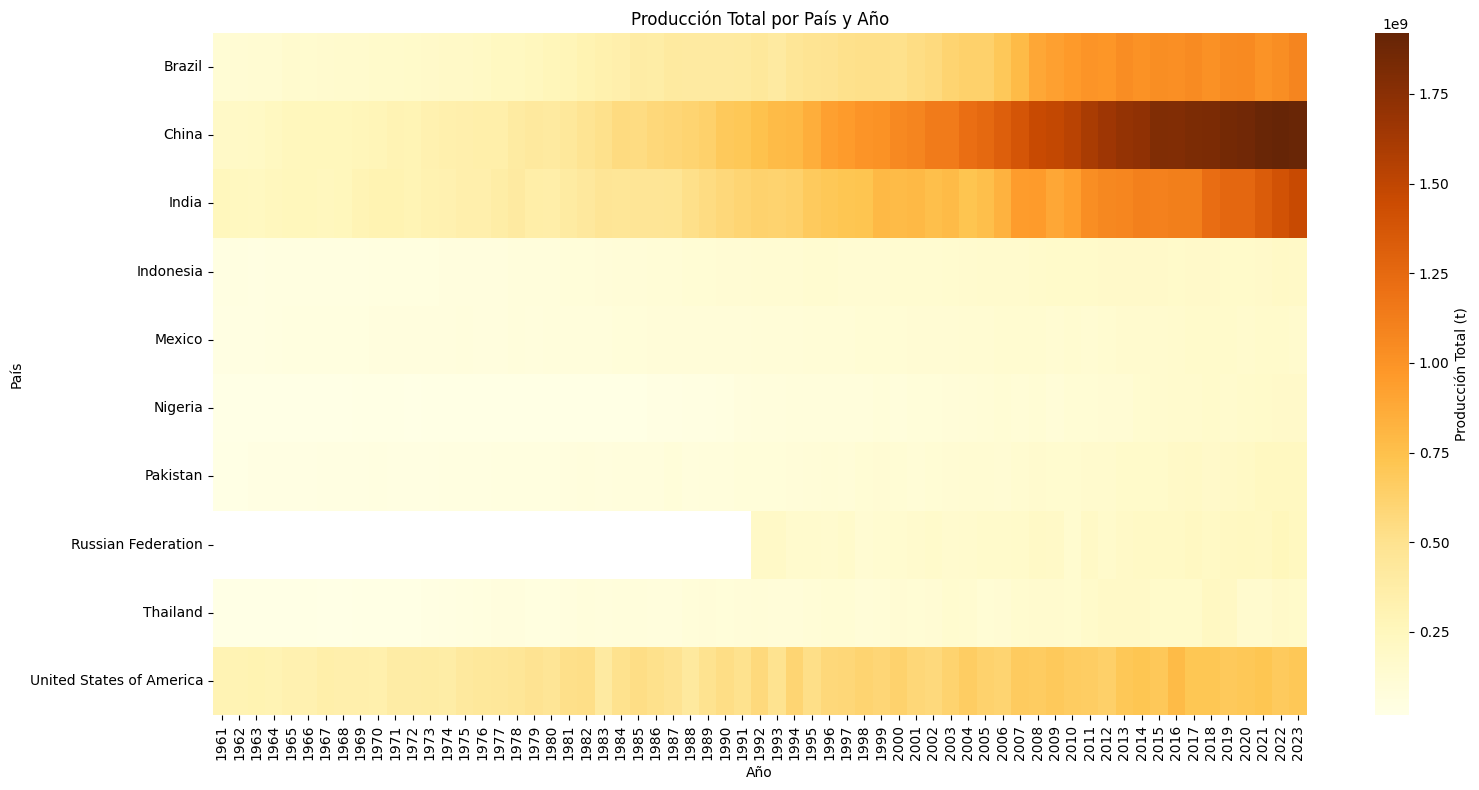

In [ ]:
# Heatmap de producción total por país y año
df_pivot['Produccion_Total'] = df_pivot['Agrícola'] + df_pivot['Ganadera']

# Filtro solo los países del top 10 para mantener consistencia con gráficas anteriores
paises_top10 = [
    'China', 'India', 'Brazil', 'United States of America',
    'Russian Federation', 'Pakistan', 'Indonesia', 'Thailand', 'Nigeria','Mexico'
]
df_top10 = df_pivot[df_pivot['Area'].isin(paises_top10)]

# Creo tabla pivot para producción total
heatmap_total = df_top10.pivot(index='Area', columns='Year', values='Produccion_Total')

# Grafico heatmap de producción total
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_total, cmap='YlOrBr', cbar_kws={'label': 'Producción Total (t)'})
plt.title('Producción Total por País y Año')
plt.xlabel('Año')
plt.ylabel('País')
plt.tight_layout()
plt.show()


## 🔍 Análisis del Heatmap de Producción Total (1961–2023)
El gráfico representa la evolución de la producción total (agrícola + ganadera) en toneladas para los principales países productores a lo largo del período 1961–2023.

## 🌍 Observaciones clave:
- China lidera la producción global: Su crecimiento sostenido y exponencial desde la década de 1980 destaca fuertemente. La magnitud de su producción total es tan alta que tiende a "aplanar visualmente" las variaciones de otros países en la escala del heatmap. Esta expansión podría estar asociada a la liberalización económica, reformas rurales, inversión en infraestructura agrícola y políticas de autosuficiencia alimentaria implementadas desde 1978.

- India y Brasil muestran crecimiento sostenido: Ambos países exhiben una tendencia de crecimiento moderada pero continua, lo que sugiere una expansión estructural en su capacidad agrícola y ganadera, posiblemente asociada a mejoras tecnológicas, políticas de fomento productivo y expansión de áreas cultivables.

- Estados Unidos mantiene un volumen elevado y estable: A diferencia de China, que muestra crecimiento acelerado, EE.UU. se caracteriza por un alto volumen total que crece de forma más gradual. Esto podría reflejar un sistema productivo maduro, con optimización de rendimientos más que expansión de superficie.

- México, Indonesia, Nigeria y Pakistán se ubican en un segundo grupo de países con niveles más bajos de producción total, pero con crecimiento lento y constante. El caso de Pakistán ya se destacó previamente por su transición hacia una mayor proporción ganadera.

- La Federación Rusa presenta datos recién a partir de 1992, probablemente por razones políticas y administrativas derivadas de la disolución de la URSS. Desde entonces, su producción ha sido relativamente constante, aunque en valores menores en comparación con otros países del gráfico.


Este gráfico resalta la necesidad de normalizar o descomponer los datos (por superficie, por población, o por tipo de producción) para detectar patrones menos visibles que quedan opacados por el volumen absoluto de gigantes productivos como China.

In [ ]:
# Ranking dinámico de países por tipo de producción año a año
# Selecciono las columnas necesarias
df_ranking = df_pivot[['Area', 'Year', 'Agrícola', 'Ganadera']].copy()
df_ranking['Total'] = df_ranking['Agrícola'] + df_ranking['Ganadera']

# Obtengo el top 5 agrícola y ganadero por año
ranking_agricola = df_ranking.sort_values(by=['Year', 'Agrícola'], ascending=[True, False])
ranking_ganadera = df_ranking.sort_values(by=['Year', 'Ganadera'], ascending=[True, False])

top5_agricola = ranking_agricola.groupby('Year').head(5)
top5_ganadera = ranking_ganadera.groupby('Year').head(5)

# Añado tipo de ranking
top5_agricola['Ranking'] = 'Agrícola'
top5_ganadera['Ranking'] = 'Ganadera'

# Uno ambos
df_ranking_dinamico = pd.concat([top5_agricola, top5_ganadera])
display(df_ranking_dinamico.head(20))  # Ver primeros registros
df_ranking_dinamico.to_csv("ranking_dinamico.csv", index=False)


<ipython-input-45-1920626678>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_agricola['Ranking'] = 'Agrícola'
<ipython-input-45-1920626678>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_ganadera['Ranking'] = 'Ganadera'


Tipo,Area,Year,Agrícola,Ganadera,Total,Ranking
13259,United States of America,1961,2.293373e+08,70833466.00,3.001708e+08,Agrícola
5797,India,1961,2.186688e+08,29111852.00,2.477807e+08,Agrícola
12944,USSR,1961,2.167375e+08,70105408.00,2.868429e+08,Agrícola
2428,China,1961,1.862895e+08,3892678.45,1.901822e+08,Agrícola
1514,Brazil,1961,1.089065e+08,8319412.00,1.172259e+08,Agrícola
13260,United States of America,1962,2.302187e+08,71192268.00,3.014109e+08,Agrícola
5798,India,1962,2.119505e+08,28248380.00,2.401989e+08,Agrícola
12945,USSR,1962,2.106576e+08,71829308.00,2.824870e+08,Agrícola
2429,China,1962,1.943649e+08,3981640.02,1.983465e+08,Agrícola
1515,Brazil,1962,1.156196e+08,8503754.00,1.241233e+08,Agrícola


In [ ]:
# Clasifico países por evolución en su proporción ganadera
year_min = df_pivot['Year'].min()
year_max = df_pivot['Year'].max()

# Calculo media de proporción ganadera por país para los primeros y últimos 20 años
df_ini = df_pivot[df_pivot['Year'] <= year_min + 19]
df_fin = df_pivot[df_pivot['Year'] >= year_max - 19]

prom_ini = df_ini.groupby('Area')['Proporcion_Ganadera'].mean().reset_index().rename(columns={'Proporcion_Ganadera': 'Promedio_Inicial'})
prom_fin = df_fin.groupby('Area')['Proporcion_Ganadera'].mean().reset_index().rename(columns={'Proporcion_Ganadera': 'Promedio_Final'})

# Uno ambos y calculo diferencia
df_evolucion = pd.merge(prom_ini, prom_fin, on='Area')
df_evolucion['Diferencia'] = df_evolucion['Promedio_Final'] - df_evolucion['Promedio_Inicial']

# Clasificación
def clasificar(d):
    if d > 0.01:
        return 'Creciente'
    elif d < -0.01:
        return 'Decreciente'
    else:
        return 'Estable'

df_evolucion['Tendencia'] = df_evolucion['Diferencia'].apply(clasificar)
df_evolucion


,Area,Promedio_Inicial,Promedio_Final,Diferencia,Tendencia
0,Afghanistan,0.144173,0.210663,0.066490,Creciente
1,Albania,0.209710,0.341369,0.131659,Creciente
2,Algeria,0.109939,0.144467,0.034527,Creciente
3,Angola,0.059732,0.019419,-0.040313,Decreciente
4,Antigua and Barbuda,0.375398,0.449730,0.074332,Creciente
...,...,...,...,...,...
170,Venezuela (Bolivarian Republic of),0.146556,0.183742,0.037186,Creciente
171,Viet Nam,0.011240,0.016469,0.005228,Estable
172,Yemen,0.208061,0.229523,0.021462,Creciente
173,Zambia,0.057718,0.076927,0.019209,Creciente


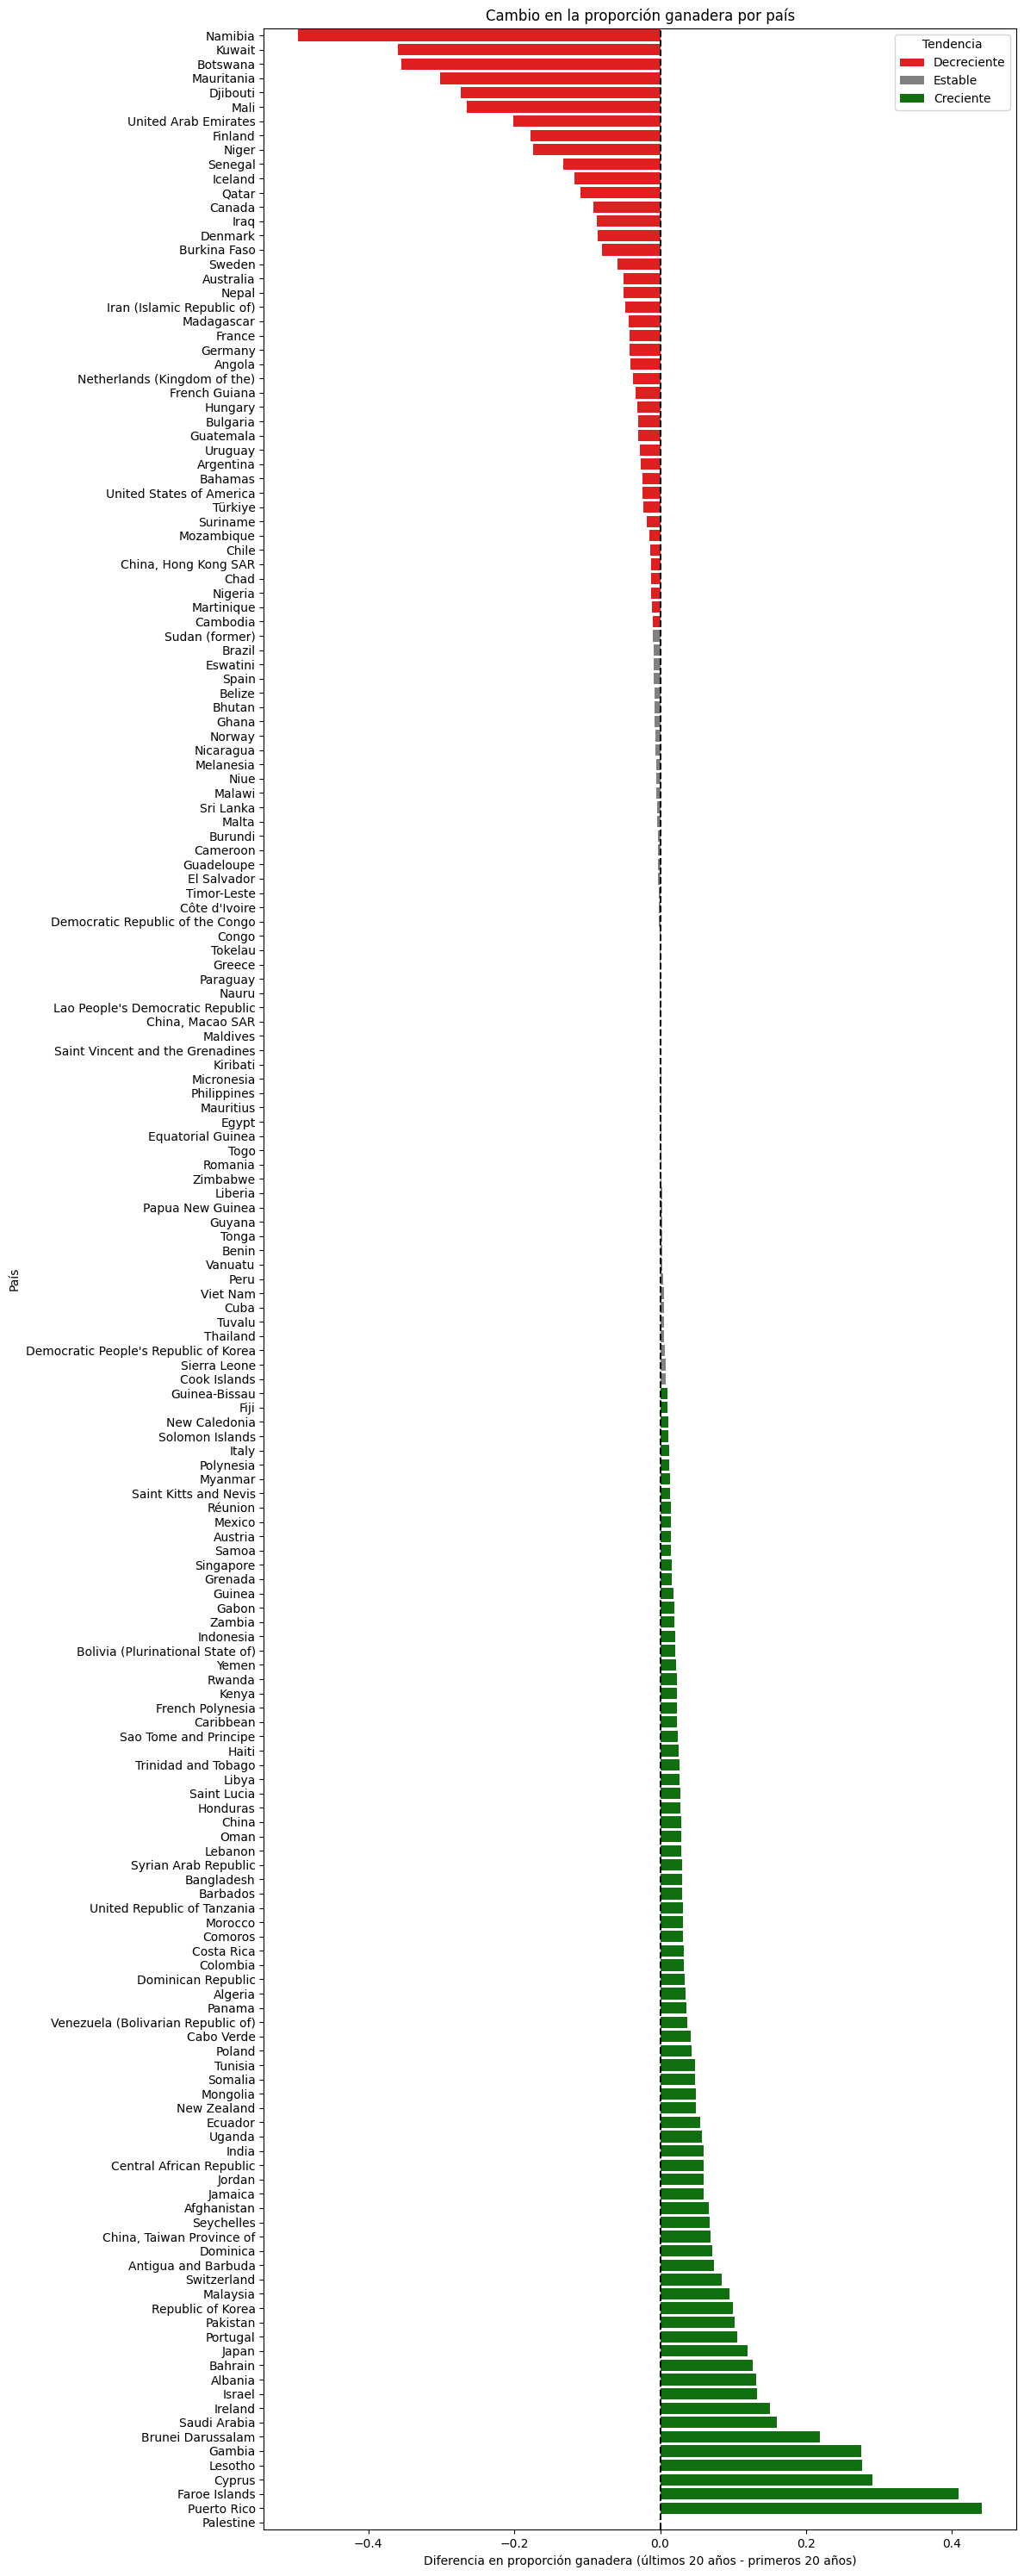

In [ ]:
if not df_evolucion.empty:
  # Ordenar por tipo de tendencia
    df_plot = df_evolucion.sort_values('Diferencia')

    plt.figure(figsize=(12, 30))
    sns.barplot(
        data=df_plot,
        x='Diferencia',
        y='Area',
        hue='Tendencia',
        dodge=False,
        palette={'Creciente': 'green', 'Estable': 'gray', 'Decreciente': 'red'}
    )

    plt.axvline(0, color='black', linestyle='--')
    plt.title('Cambio en la proporción ganadera por país')
    plt.xlabel('Diferencia en proporción ganadera (últimos 20 años - primeros 20 años)')
    plt.ylabel('País')
    plt.tight_layout()
    plt.show()

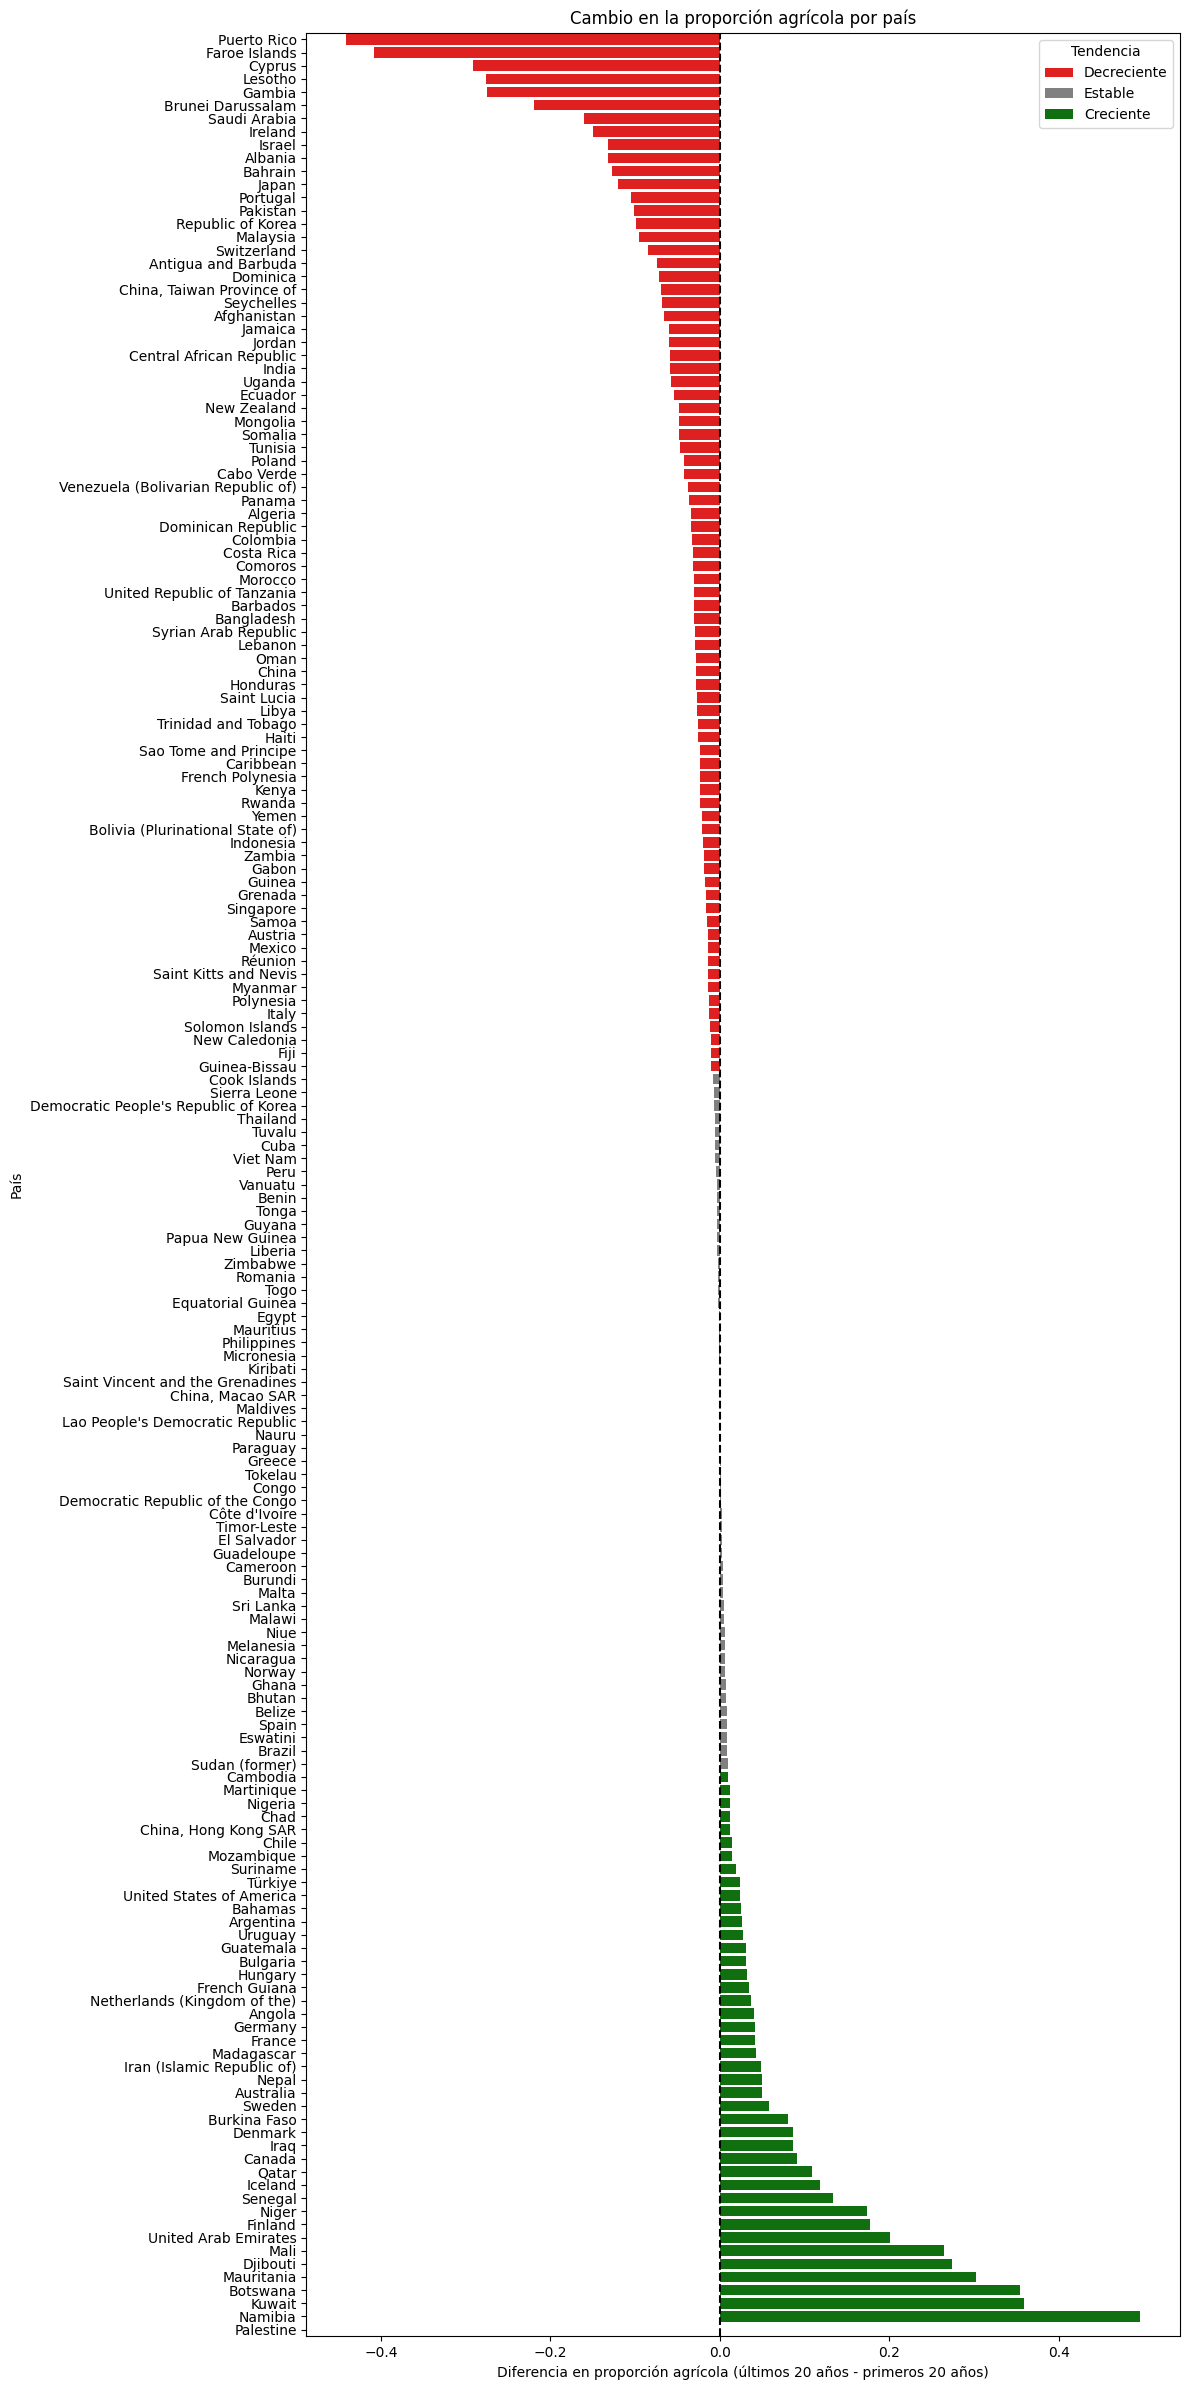

In [ ]:
# Repetimos el análisis pero para proporción agrícola

# Promedios por país para primeros y últimos 20 años registrados
year_min = df_pivot['Year'].min()
year_max = df_pivot['Year'].max()

df_ini = df_pivot[df_pivot['Year'] <= year_min + 19]
df_fin = df_pivot[df_pivot['Year'] >= year_max - 19]

prom_ini = df_ini.groupby('Area')['Proporcion_Agricola'].mean().reset_index().rename(columns={'Proporcion_Agricola': 'Promedio_Inicial'})
prom_fin = df_fin.groupby('Area')['Proporcion_Agricola'].mean().reset_index().rename(columns={'Proporcion_Agricola': 'Promedio_Final'})

df_evolucion_agri = pd.merge(prom_ini, prom_fin, on='Area')
df_evolucion_agri['Diferencia'] = df_evolucion_agri['Promedio_Final'] - df_evolucion_agri['Promedio_Inicial']

# Clasificación
df_evolucion_agri['Tendencia'] = df_evolucion_agri['Diferencia'].apply(lambda d: 'Creciente' if d > 0.01 else ('Decreciente' if d < -0.01 else 'Estable'))

# Visualización
df_plot_agri = df_evolucion_agri.sort_values('Diferencia')

plt.figure(figsize=(12, 24))
sns.barplot(
    data=df_plot_agri,
    x='Diferencia',
    y='Area',
    hue='Tendencia',
    dodge=False,
    palette={'Creciente': 'green', 'Estable': 'gray', 'Decreciente': 'red'}
)

plt.axvline(0, color='black', linestyle='--')
plt.title('Cambio en la proporción agrícola por país')
plt.xlabel('Diferencia en proporción agrícola (últimos 20 años - primeros 20 años)')
plt.ylabel('País')
plt.tight_layout()
plt.show()


## 🧭 Descripción de los cambios en proporciones ganaderas y agrícolas
### 📈 Gráfico 1: Cambio en la proporción ganadera por país (últimos 20 años vs. primeros 20 años)
Este gráfico permite visualizar la evolución estructural del componente ganadero en las economías nacionales a lo largo del tiempo. Se destacan tres patrones:

- Tendencia creciente (barra verde): países que aumentaron su proporción de producción ganadera.

Ejemplos destacados: Palestine, Puerto Rico, Faroe Islands, Lesotho, Gambia.

Muchos de estos países presentan menor superficie agrícola y un giro hacia productos animales o mixtos.

- Tendencia decreciente (barra roja): países cuya proporción ganadera disminuyó.

Casos notables: Namibia, Kuwait, Botswana, Mauritania, Mali, Emiratos Árabes.

Predominan países del África subsahariana y Medio Oriente, posiblemente por degradación ambiental o transición hacia cultivos resistentes al clima.

- Tendencia estable (barra gris): países sin cambios significativos.

Incluye países con proporciones ganaderas bajas y constantes, como Brasil, Nigeria, España, Noruega.

### 🌾 Gráfico 2: Cambio en la proporción agrícola por país (últimos 20 años vs. primeros 20 años)
Aquí se observa la evolución del peso relativo de la agricultura en la producción total:

- Tendencia creciente (verde): países que reforzaron su perfil agrícola.

Ejemplos: Palestina, Kuwait, Mali, Mauritania, Burkina Faso.

Se destaca un grupo de países africanos que intensificaron su producción vegetal, tal vez como respuesta a inseguridad alimentaria.

- Tendencia decreciente (rojo): países que redujeron su proporción agrícola.

Casos destacados: Puerto Rico, Faroe Islands, Pakistan, República de Corea.

En muchos casos, esta caída puede asociarse al crecimiento de la ganadería o a una diversificación hacia servicios o manufactura.

- Estables: países que mantuvieron un equilibrio. Muchos están en regiones tropicales o ecuatoriales.



## ✅ Conclusiones del Análisis
- Países con menor desarrollo económico tienden a mantener estructuras agrícolas estables, como se observó en Nigeria, Indonesia o Tailandia, con una proporción agrícola constante a lo largo del tiempo.

- En contraste, economías más desarrolladas (como EE.UU., Alemania o Francia) presentan una mayor diversificación y un aumento paulatino de la proporción ganadera, posiblemente vinculada a políticas de valor agregado o fuerte demanda interna.

- Se detectaron cambios estructurales relevantes, como el caso de Pakistán, que pasó de un perfil agrícola a uno más ganadero, lo que podría responder a cambios climáticos o de mercado.

- En países como China e India, el crecimiento exponencial de la producción total —especialmente agrícola— sugiere un rol clave como productores globales, aunque con perfiles estructurales distintos.

- La producción ganadera se mantiene baja en países con fuerte identidad agrícola-cultural (ej. China, Indonesia, Nigeria), lo cual podría estar relacionado con costumbres alimentarias o restricciones ambientales.

## 🔭 Proyecciones y Líneas Futuras
- 🔄 Integrar variables socioeconómicas (PBI, IDH) y climáticas para entender mejor los factores que explican los cambios en proporciones agrícolas y ganaderas.

- 📈 Detectar puntos de inflexión estructural mediante modelos de cambio, para vincularlos con eventos políticos o ambientales clave.

- 🌱 Ampliar el análisis a cultivos específicos, como cereales o frutas, para evaluar si hay especialización dentro de una proporción agrícola estable.

- 🌍 Comparar dinámicas por regiones o bloques económicos para explorar políticas comunes, patrones de exportación o dependencia externa.

- 🔮 Modelar proyecciones de proporciones estructurales a futuro usando series temporales, contemplando escenarios de desarrollo, clima y mercado.